# Q1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np

Basic Analysis

In [39]:
df=pd.read_csv('fitgear.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [40]:
df.shape

(180, 9)

In [41]:
df_sub=df[['Age','Education',"Usage",'Fitness','Income',"Miles"]]
df.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
87,KP481,23,Male,14,Partnered,3,3,36384,95
3,KP281,19,Male,12,Single,3,3,32973,85
108,KP481,26,Female,16,Partnered,4,3,45480,85
51,KP281,29,Female,14,Partnered,2,2,46617,38
14,KP281,23,Male,16,Partnered,3,1,38658,47


In [42]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [43]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [44]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# Q2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [45]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [46]:
df.median(numeric_only=True)

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

Boxplot to detect outliers

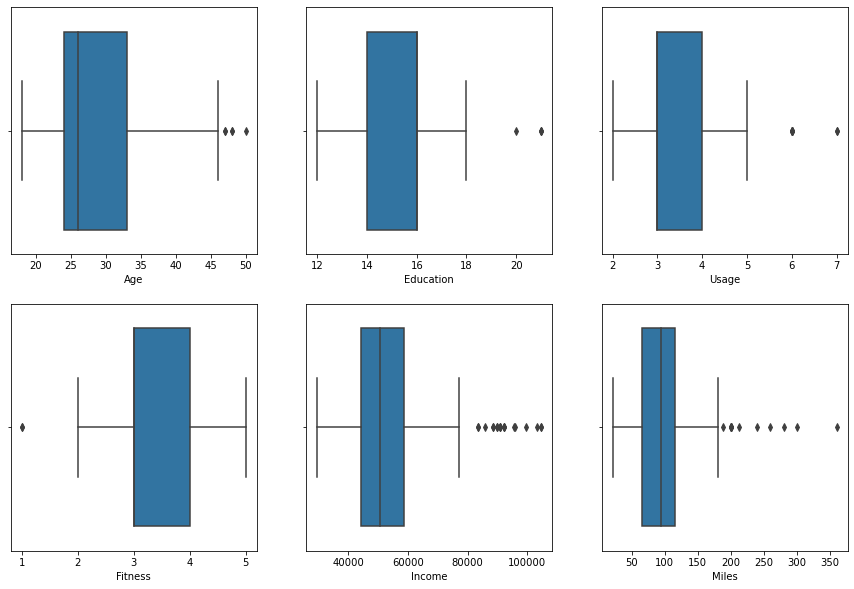

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x='Age')
plt.subplot(2,3,2)
sns.boxplot(data=df,x='Education')
plt.subplot(2,3,3)
sns.boxplot(data=df,x='Usage')
plt.subplot(2,3,4)
sns.boxplot(data=df,x='Fitness')
plt.subplot(2,3,5)
sns.boxplot(data=df,x='Income')
plt.subplot(2,3,6)
sns.boxplot(data=df,x='Miles')
plt.show()

Clipping of Data

In [48]:
#Clipping the data for range 5 percentile and 95 percentile
for i in df_sub.columns:
    df[i]=(np.clip(df[i],np.round(df[i].quantile(0.05),2),np.round(df[i].quantile(0.95),2)))
    #print(df[i].quantile(0.05),df[i].quantile(0.95))
  

In [49]:
print(df.to_string())

    Product    Age  Gender  Education MaritalStatus  Usage  Fitness    Income  Miles
0     KP281  20.00    Male       14.0        Single   3.00      4.0  34053.15  112.0
1     KP281  20.00    Male       15.0        Single   2.00      3.0  34053.15   75.0
2     KP281  20.00  Female       14.0     Partnered   4.00      3.0  34053.15   66.0
3     KP281  20.00    Male       14.0        Single   3.00      3.0  34053.15   85.0
4     KP281  20.00    Male       14.0     Partnered   4.00      2.0  35247.00   47.0
5     KP281  20.00  Female       14.0     Partnered   3.00      3.0  34053.15   66.0
6     KP281  21.00  Female       14.0     Partnered   3.00      3.0  35247.00   75.0
7     KP281  21.00    Male       14.0        Single   3.00      3.0  34053.15   85.0
8     KP281  21.00    Male       15.0        Single   5.00      4.0  35247.00  141.0
9     KP281  21.00  Female       15.0     Partnered   2.00      3.0  37521.00   85.0
10    KP281  22.00    Male       14.0        Single   3.00      3

In [50]:

#       Age         Education   Usage       Fitness     Income      Miles

#mean   28.788889   15.572222   3.455556    3.311111    53719.57    103.194444
#Age     26.0       16          3           3           50596       94




# Q3.Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc

Count Plot

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

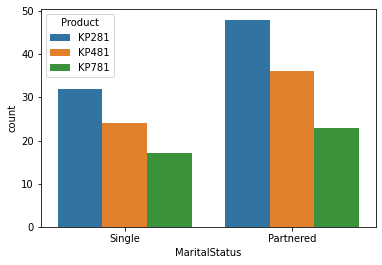

In [51]:
 sns.countplot(data=df,x='MaritalStatus',hue='Product')

Scatter Plot

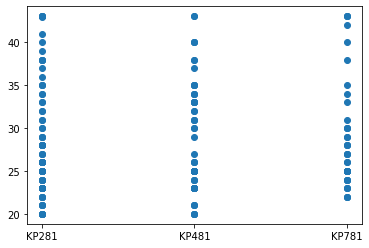

In [52]:

plt.scatter(data=df,x='Product',y='Age')


Histogram For Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

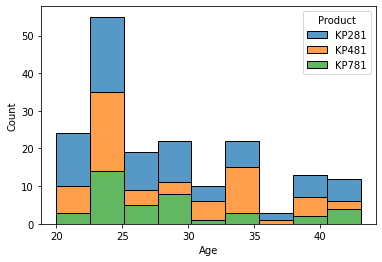

In [53]:
sns.histplot(data=df,x='Age',hue="Product",multiple='stack')

In [54]:
gr=df.groupby(['Age','Product'])['Product'].count()

In [55]:
gr=gr.reset_index(name='count')

In [56]:
gr

,Age,Product,count
0,20.00,KP281,6
1,20.00,KP481,4
2,21.00,KP281,4
3,21.00,KP481,3
4,22.00,KP281,4
5,22.00,KP781,3
6,23.00,KP281,8
7,23.00,KP481,7
8,23.00,KP781,3
9,24.00,KP281,5


Scatter Plot (Age vs Product Count)

<AxesSubplot:xlabel='Age', ylabel='count'>

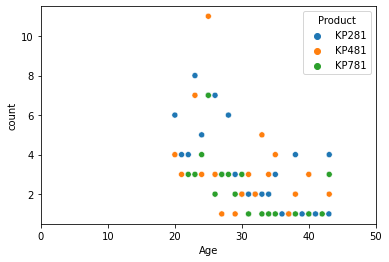

In [57]:
plt.xlim(0,50)
sns.scatterplot(data=gr,x='Age',y='count',hue='Product')

Count Plot (Gender vs Count)

<AxesSubplot:xlabel='Gender', ylabel='count'>

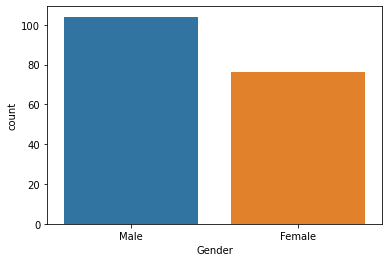

In [58]:
sns.countplot(data=df,x='Gender')

Count Plot (Gender vs Product Count)

<AxesSubplot:xlabel='Gender', ylabel='count'>

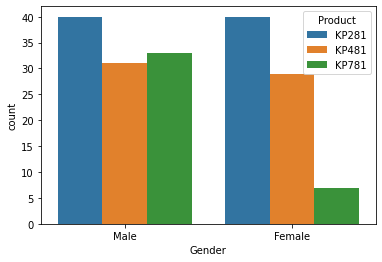

In [59]:
sns.countplot(data=df,x='Gender',hue='Product')

Insights : Does Marital Status/Age have any affect on product purchase.

Column Maritalstatus vs Product:
It is clearly evident from the graphs that people who are partnered have majority treadmill purchases done. A Similar pattern is observed with respect to the purchase made for the products; KP281 being the highest purchased product, followed by KP481 and KP781 respectively.

Column Age vs Product:
62% of the product are bought by people under the age of 30; A high purchase is observed in people with age group 20-25, which significantly seems to reduced for the age grp 35-40.

Column Gender vs Product:
The distribution of all the 3 product purchased by male are almost equal; KP281,KP781 followed by KP481 are purchased in an increasing order respectively.
For females the purchases made are lesss compared to Males

# Q4.Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

Cross Tab (Age & Product)

In [60]:
pd.crosstab(df["Age"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Age,,,,
20.0,6,4,0,10
21.0,4,3,0,7
22.0,4,0,3,7
23.0,8,7,3,18
24.0,5,3,4,12
25.0,7,11,7,25
26.0,7,3,2,12
27.0,3,1,3,7
28.0,6,0,3,9


Cross Tab (Education & Product)

In [61]:
pd.crosstab(df["Education"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Education,,,,
14.0,35,26,2,63
15.0,4,1,0,5
16.0,39,31,15,85
18.0,2,2,23,27
Total,80,60,40,180


Probability of Product based on Education

14 years -> 63/180 = 0.35

15 years -> 5/180 = 0.027

16 years -> 85/180 = 0.47

18 years -> 27/180 = 0.15


Cross Tab (Usage & Product)

In [62]:
pd.crosstab(df["Usage"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Usage,,,,
2.0,19,14,0,33
3.0,37,31,1,69
4.0,22,12,18,52
5.0,2,3,12,17
5.05,0,0,9,9
Total,80,60,40,180


Cross Tab (Fitness & Product)

In [63]:
pd.crosstab(df["Product"],df['Fitness'],margins=True,margins_name='Total')

Fitness,2.0,3.0,4.0,5.0,Total
Product,,,,,
KP281,15,54,9,2,80
KP481,13,39,8,0,60
KP781,0,4,7,29,40
Total,28,97,24,31,180


Cross Tab (Income & Product)

In [64]:
pd.crosstab(df["Income"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Income,,,,
34053.15,6,3,0,9
34110.0,2,3,0,5
35247.0,5,0,0,5
36384.0,3,1,0,4
37521.0,2,0,0,2
38658.0,3,2,0,5
39795.0,2,0,0,2
40932.0,4,2,0,6
42069.0,2,0,0,2


Cross Tab (Miles & Product)

In [65]:
pd.crosstab(df["Miles"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Miles,,,,
47.0,12,5,0,17
53.0,0,7,0,7
56.0,6,0,0,6
64.0,0,6,0,6
66.0,10,0,0,10
74.0,0,3,0,3
75.0,10,0,0,10
80.0,0,0,1,1
85.0,16,11,0,27


Cross Tab (Gender & Product)

In [66]:
pd.crosstab(df["Gender"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
Total,80,60,40,180


Cross Tab (MaritalStatus & Product)

In [67]:
pd.crosstab(df["MaritalStatus"],df['Product'],margins=True,margins_name='Total')

Product,KP281,KP481,KP781,Total
MaritalStatus,,,,
Partnered,48,36,23,107
Single,32,24,17,73
Total,80,60,40,180


Marginal Probability

-> What percent of customers have purchased KP281, KP481, or KP781

KP281 ->(80/180)*100 = 44.4%

KP481 ->(60/180)*100 = 33.3%

KP781 ->(40/180)*100 = 22.3%

# Q5. Check correlation among different factors using heat maps or pair plots.

In [68]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.301971,0.015394,0.057361,0.514362,0.029636
Education,0.301971,1.000000,0.413600,0.441082,0.628597,0.377294
Usage,0.015394,0.413600,1.000000,0.661978,0.481608,0.771030
Fitness,0.057361,0.441082,0.661978,1.000000,0.546998,0.826307
Income,0.514362,0.628597,0.481608,0.546998,1.000000,0.537297
Miles,0.029636,0.377294,0.771030,0.826307,0.537297,1.000000


<AxesSubplot:>

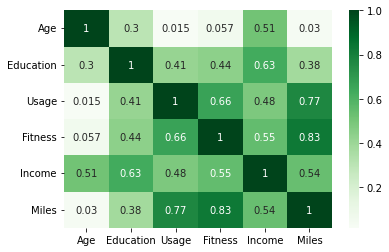

In [69]:
sns.heatmap(data=df.corr(),cmap= 'Greens', annot=True)

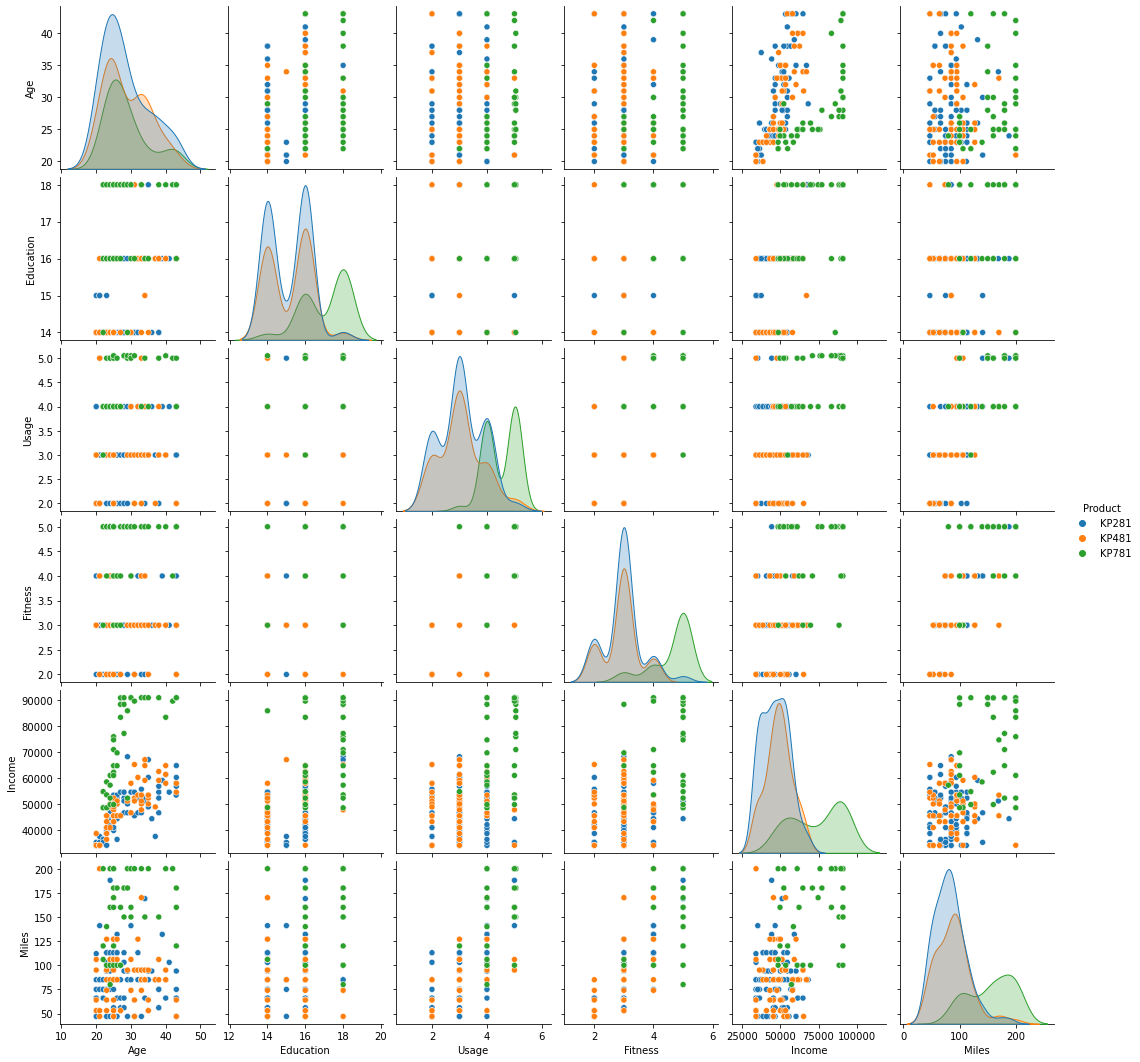

In [72]:
sns.pairplot(df,hue='Product')
plt.show()

Insights :

One could observe that there is a postive correlation between Fitness & Miles; ie if miles increase fitness increases too. (0.83).
One could observe that there is a postive correlation between Usage & Miles; ie if miles increase Usage increases too.(0.77).
One could observe that there is a postive correlation between Fitness & Usage; ie if Usage increase fitness increases too.(0.66);which is evident from first two statements.


# Q6. Customer profiling and recommendation

Customer profilings for each and every product.

For KP281 :
Age Group - Can be recommended for all age groups; Also the age group 20-30  are the majority consumers of this product.  
Gender - Can be recommended for all genders; Also males users are in high     number who use this product.
Income Group - 40000$ - 70000$
    
For KP481 :
Age Group - Can be recommended for all age groups; Also the age group between 20-25 & 30-35 are the majority consumers of this product.  
Gender - Can be recommended for all genders.
Income Group - 40000$ - 70000$; A huge no of customers who bought this product are having income in range 40000$ - 55000$    
    
For KP781 :
Age Group - Can be recommended for all age groups; But it would be more profitable if sold to age grp 20-30.  
Gender - Can be recommended for all genders. A huge no of customers who bought this product are male.
Income Group - 45000$ - 90000$; A huge no of customers who bought this product are having income 90000$        

<AxesSubplot:xlabel='Income', ylabel='Count'>

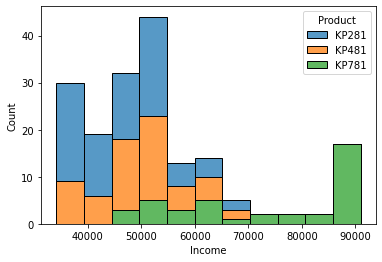

In [73]:
sns.histplot(data=df,x='Income',hue="Product",multiple='stack')

# Recommendations

1) The product KP781 could be recommended to customer with higher income for more profit as it costly than other products or the cost could be lowered to make it affordable.Also the number of female purchaser for this product is relatively less; FitGear could a run a campaign for females to encourage them.

2)The product KP281 is at an affordable price, which makes it most purchased product, FitGear could provide more offers on this product.

3)FitGear needs to heed more attention towards age grp 20-35 for more product purchases as 60 % falls under these age categories.


